In [11]:
import pandas as pd
import datasets
import numpy as np
import matplotlib.pyplot as plt

def _load_test_labels(dataset_path):
    f = open(f'{dataset_path}/sts-test.tsv', 'r', encoding='utf-8')

    l = []
    for x in f:
        curr_line = x.split('\t')
        l.append(np.float32(curr_line[4]))
    
    labels = np.array(l)
    df_labels = pd.DataFrame.from_dict({'label':labels})
    hf_df = datasets.Dataset.from_pandas(df_labels)
    return hf_df

def load_dataset_from_huggingface(dataset_path, config_name, label_dir):
    dataset = datasets.load_dataset(dataset_path, config_name)

    test_labels = _load_test_labels(label_dir)
    dataset['test'] = dataset['test'].remove_columns('label')
    dataset['test'] = dataset['test'].add_column(name='label', column=test_labels['label'])
    return dataset

In [5]:
dataset = load_dataset_from_huggingface('glue', 'stsb', '../dataset/stsb')

Reusing dataset glue (C:\Users\Ivan\.cache\huggingface\datasets\glue\stsb\1.0.0\dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

In [8]:
df_train = dataset['train'].to_pandas()
df_validation = dataset['validation'].to_pandas()
df_test = dataset['test'].to_pandas()

df_train.head()

,sentence1,sentence2,label,idx
0,A plane is taking off.,An air plane is taking off.,5.00,0
1,A man is playing a large flute.,A man is playing a flute.,3.80,1
2,A man is spreading shreded cheese on a pizza.,A man is spreading shredded cheese on an uncoo...,3.80,2
3,Three men are playing chess.,Two men are playing chess.,2.60,3
4,A man is playing the cello.,A man seated is playing the cello.,4.25,4


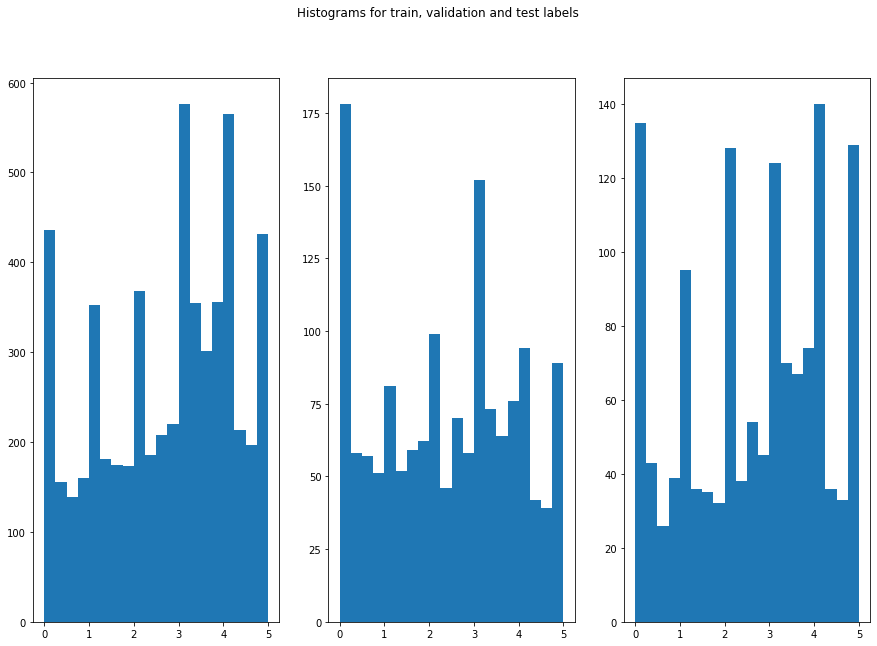

In [25]:
train_labels = df_train['label'].to_numpy()
validation_labels = df_validation['label'].to_numpy()
test_labels = df_test['label'].to_numpy()

fig, axs = plt.subplots(1, 3, figsize=(15, 10))
plt.suptitle('Histograms for train, validation and test labels')
axs[0].hist(train_labels, bins=20)
axs[1].hist(validation_labels, bins=20)
axs[2].hist(test_labels, bins=20)
plt.show()
fig.savefig('../figures/hist.png')